# Task 1

In [12]:
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import random
from scipy import sparse
from matplotlib.pyplot import figure


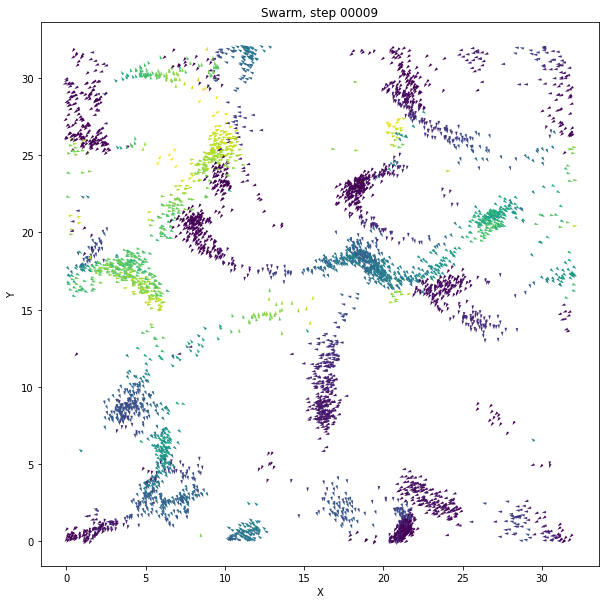

In [16]:
# initializing our birds positions
def initialize_birds(L, N):
    x_positons = np.random.uniform(0, L - 1, N) 
    y_positons = np.random.uniform(0, L - 1, N) 

    combined = np.vstack((x_positons, y_positons)).T
    return combined


# we have to make a 2d vector of velocities
def initialize_velocities(positions, v_0):

    xes = positions[0:, 0:1]
    yes = positions[0:, 1:] * 1j
    z = xes + yes

    angles = np.angle(z)
    vx = v_0 * np.cos(angles)
    vy = v_0 * np.sin(angles)    

    combined = np.column_stack((vx, vy))
    return combined


def init_angles(number):
    x = np.random.uniform(-1, 1, number)
    y = np.random.uniform(-1, 1, number)

    z = x + 1j * y
    return np.asmatrix(np.angle(z)).T 


# calculating angles of birds vs horiontal line
def calc_angles(positions):

    xes = positions[0:, 0:1]
    yes = positions[0:, 1:] * 1j
    z = xes + yes

    angles = np.angle(z)
    return angles


# add noise in radians
def add_noise(noise_val_degrees, number):
    noise = np.random.uniform(-noise_val_degrees, noise_val_degrees, number)
    noise_radians = np.radians(noise)

    return noise_radians


def update_angles(dist, angles, noise_degrees):

    dist_copy = dist.copy()
    dist_copy_dense = dist_copy.todense()
    dist_no_zero = dist_copy_dense != 0
    dist_copy_dense[dist_no_zero] = 1

    exp_angles_vec = np.exp(1j * angles)
    sum_average_direction = np.dot(dist_copy_dense, exp_angles_vec)
    noise = add_noise(noise_degrees, N)
    noise_matrix = np.asmatrix(noise).T
    new_angles = np.angle(sum_average_direction) + a * noise_matrix
    return new_angles   


def apply_boundary_conditions(positions, new_x, new_y, L):
    # boundary conditions
    new_x = np.where(new_x < L, new_x, new_x - L)
    new_x = np.where(new_x > 0, new_x, new_x + L)

    new_y = np.where(new_y < L, new_y, new_y - L)
    new_y = np.where(new_y > 0, new_y, new_y + L)

    positions[0:, 0:1] = new_x
    positions[0:, 1:] = new_y


# Initialization parameters

L = 32
N = 5000
r = 1
r_b = 4
v_0 = 2
a = 0.15
noise_degrees = 50

t_steps = 10

#  Here we initialize our birds postions and velocities
positions = initialize_birds(L, N)
velocities = initialize_velocities(positions, v_0)
#   test init angles
angles = init_angles(N) # here i have to think how to repair it 


for t in range(t_steps):

    # Creation of birds tree 
    birds_tree = cKDTree(positions, boxsize=[L,L])
    dist = birds_tree.sparse_distance_matrix(birds_tree,max_distance=r,output_type='coo_matrix')

    new_angles = update_angles(dist, angles, noise_degrees)
    angles = new_angles

    x_dir = np.cos(new_angles)
    y_dir = np.sin(new_angles)  

    new_x = positions[0:, 0:1] + v_0 * np.cos(new_angles) 
    new_y = positions[0:, 1:] + v_0 * np.sin(new_angles)   

    apply_boundary_conditions(positions, new_x, new_y, L)

    if t % 1 == 0:
        # Plot birds 
        plt.rcParams["figure.figsize"] = (10, 10)
        plt.clf()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.quiver(np.asarray(positions[0:, 0:1]), np.asarray(positions[0:, 1:]), np.asarray(x_dir), np.asarray(y_dir) , np.asarray(x_dir + y_dir))
        
        nStr = str(t) 
        nStr = nStr.rjust(5, '0')
        plt.title("Swarm, step " + nStr)
        plt.savefig('img' + nStr + '.png')



### Delete plots

In [15]:
import os

dir_name = "D:\Matieriały_magisterskie\sem_1\Computer modeling of complex systems\cmcs_lab_3"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".png"):
        os.remove(os.path.join(dir_name, item))

### Make animation

In [17]:
import os
import imageio

png_dir = os.getcwd()
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave(png_dir + "\\new.gif", images)



# Task 2